#__Supervised Learning: Classification__#

##__Agenda__##

- Supervised Learning
- Decision Tree
  * Working of Decision Tree
  * Decision Tree Assumptions
  * Advantages of Decision Tree
  * Disadvantages of Decision Tree
- Random Forest
  * Advantages of Random Forest
  * Disadvantages of Random Forest
- Support Vector Machine

##__1. Supervised Learning__##

Supervised learning is a type of machine learning where the algorithm learns from labeled data, which consists of input-output pairs. In supervised learning, the algorithm is trained on a dataset, including input features and corresponding correct output labels. The goal is for the algorithm to learn the mapping or relationship between the input features and the output labels to make predictions or decisions about new, unseen data.

There are two categories of supervised learning:
- Regression
- Classification


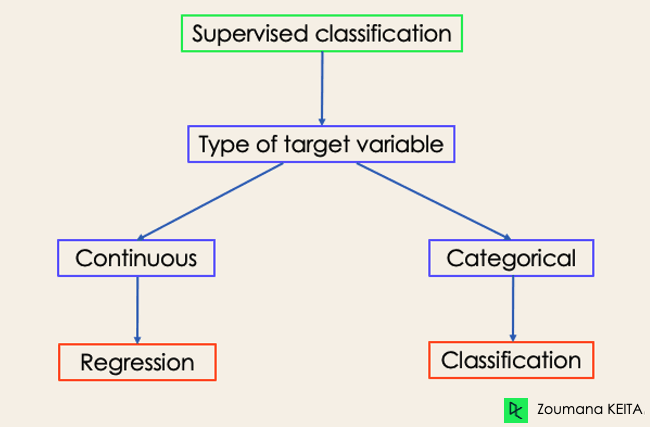

- The prediction task is a classification when the target variable is discrete. An example can be predicting whether a person has diabetes based on his sugar level, blood pressure, and so on.
- The prediction task is a regression when the target variable is continuous. An example can be predicting the salary of a person given their education degree, previous work experience, geographical location, and level of seniority.

Various algorithms help you build classification models. In the previous lesson, you covered some classification models like Naive Bayes, Stochastic Gradient Descent, and K Nearest Neighbour. In this lesson, you will cover a few more classification algorithms.

##__2. Decision Tree__##

A decision tree is a non-parametric supervised learning algorithm for classification and regression tasks.
- It has a hierarchical tree structure consisting of a root node, branches, internal nodes, and leaf nodes.
- Decision trees are used for classification and regression tasks, providing easy-to-understand models.

The following diagram demonstrates the different parts of a decision tree:


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_05_Supervised_Learning_Classification/decision_tree.png)

The tree-like structure consists of nodes, branches, and leaves.

A node represents a place where a question is asked or an attribute is selected.

The leaves represent the output or class label.



**Root Node:** This is the top node of the tree, from which the decision-making process begins. It represents the entire dataset and is split into two or more child nodes based on the feature that provides the best split.

**Decision Node:** These are intermediate nodes in the tree that represent a decision based on a feature's value. Each decision node splits the dataset into smaller subsets based on a specific feature and its value.

**Leaf Node:** These are the endpoints of the decision tree branches. They represent the final decision or outcome. A leaf node does not split further and contains the predicted outcome or class label.

Example: The following decision tree diagram represents the criteria for buying a car based on its color, model year, and mileage.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_05_Supervised_Learning_Classification/decision_tree_example.png)

###__2.1 Working Of Decision Tree__###

Starting at the Root: The algorithm begins at the top, called the root node, representing the entire dataset.

Asking the Best Questions: It looks for the most important feature or question that splits the data into the most distinct groups, akin to asking a question at a fork in the tree.

Branching Out: Based on the answer to the question, it divides the data into smaller subsets, creating new branches. Each branch represents a possible route through the tree.

Repeating the Process: The algorithm continues asking questions and splitting the data at each branch until it reaches the final "leaf nodes," which represent the predicted outcomes or classifications.


###__2.2 Decision Tree Assumptions__###

- Decision trees typically make binary splits, meaning each node divides the data into two subsets based on a single feature or condition, assuming each decision can be represented as a binary choice.

- Decision trees often assume that the features for splitting nodes are independent, although this may not be true. Nonetheless, decision trees can still perform well if features are correlated.

- Decision trees are constructed using a top-down, greedy approach, where each split is chosen to maximize information gain or minimize impurity at the current node, which may not always result in the globally optimal tree.

- Decision trees may assume equal importance for all features unless feature scaling or weighting is applied to emphasize certain features.


###__2.3 Advantages of Decision Tree__###

- Captures the interactions between features within the data
- Is easy to interpret
- Does not require data normalization


###__2.4 Disadvantages of Decision Tree__###

- Does not account for linear relationships
- Requires additional time to train the model
- Becomes costly due to its complexity and extended training time


Let's now build a decision tree model.

- Import NumPy, pandas, Seaborn, and matplotlib.pyplot libraries.
- Configure matplotlib settings.
- Read the dataset and display the first few rows.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('balance-scale.data',sep=',')
df.head()

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


__Observation__
- In the above output, the first few rows of the dataset can be seen.

- Display information about the dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left weight     625 non-null    int64 
 2   Left distance   625 non-null    int64 
 3   Right weight    625 non-null    int64 
 4   Right distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


__Observations__
- The Class Name is the target variable that you are going to predict.
- You can see that these values are not null.



- Split the dataset into training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Class Name',axis=1)
y = df[['Class Name']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)


- Import DecisionTreeClassifier from sklearn.tree.
- Train the model using the training dataset.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)


- Predict the outcomes using the testing dataset.


In [ ]:
y_predict = clf_model.predict(X_test)


- Import accuracy_score, classification_report, and confusion_matrix from sklearn.metrics.
- Calculate the accuracy score.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_test contains the true labels and y_predict contains the predicted labels
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_predict, zero_division=1)
print("Classification Report:")
print(report)

Accuracy: 0.7021276595744681
Confusion Matrix:
[[ 0  8 10]
 [ 0 62 18]
 [ 0 20 70]]
Classification Report:
              precision    recall  f1-score   support

           B       1.00      0.00      0.00        18
           L       0.69      0.78      0.73        80
           R       0.71      0.78      0.74        90

    accuracy                           0.70       188
   macro avg       0.80      0.52      0.49       188
weighted avg       0.73      0.70      0.67       188



__Observation__
- In the above output, you can see the confusion matrix and the values for accuracy, precision, recall, f1-score, and support.


- Create a list of target and feature names.
- Import export_text from sklearn.tree.
- Display the decision tree as text.


In [ ]:
target = list(df['Class Name'].unique())
feature_names = list(X.columns)

__Observation__
- Now, you have created a target.

Let's plot the decision tree using an export_tree.

In [ ]:
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- Left weight <= 2.50
|   |--- Right distance <= 1.50
|   |   |--- Left distance <= 2.50
|   |   |   |--- class: R
|   |   |--- Left distance >  2.50
|   |   |   |--- class: L
|   |--- Right distance >  1.50
|   |   |--- Right weight <= 2.50
|   |   |   |--- class: R
|   |   |--- Right weight >  2.50
|   |   |   |--- class: R
|--- Left weight >  2.50
|   |--- Left distance <= 2.50
|   |   |--- Right weight <= 2.50
|   |   |   |--- class: L
|   |   |--- Right weight >  2.50
|   |   |   |--- class: R
|   |--- Left distance >  2.50
|   |   |--- Right distance <= 3.50
|   |   |   |--- class: L
|   |   |--- Right distance >  3.50
|   |   |   |--- class: L



__Observations__
- You can see how the decision tree has spread.
- For example, in the above case, the left weight is distributed between two points: less than 2.5 and greater than 2.5.
- The right distance is divided into two points: less than 1.5 and greater than 5.
- Finally, you have a class making predictions, as this is how it is predicted from top to bottom.

##__3. Random Forest__##

Random Forest, an ensemble learning method, is used for classification and regression tasks. It constructs multiple decision trees during training and outputs the mode.

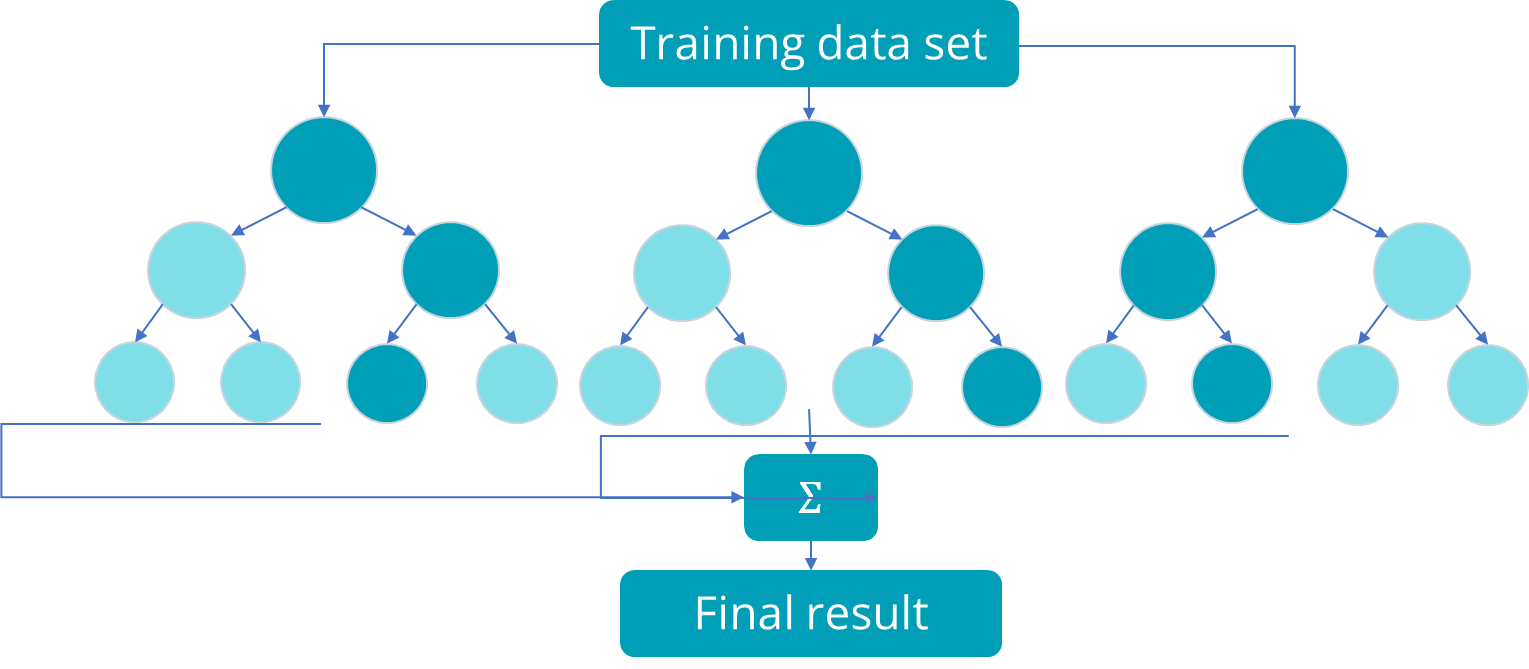

It is an ensemble learning technique that combines multiple classifiers to solve a complex problem.

The primary difference between a typical decision tree and a random forest algorithm lies in how they select features.

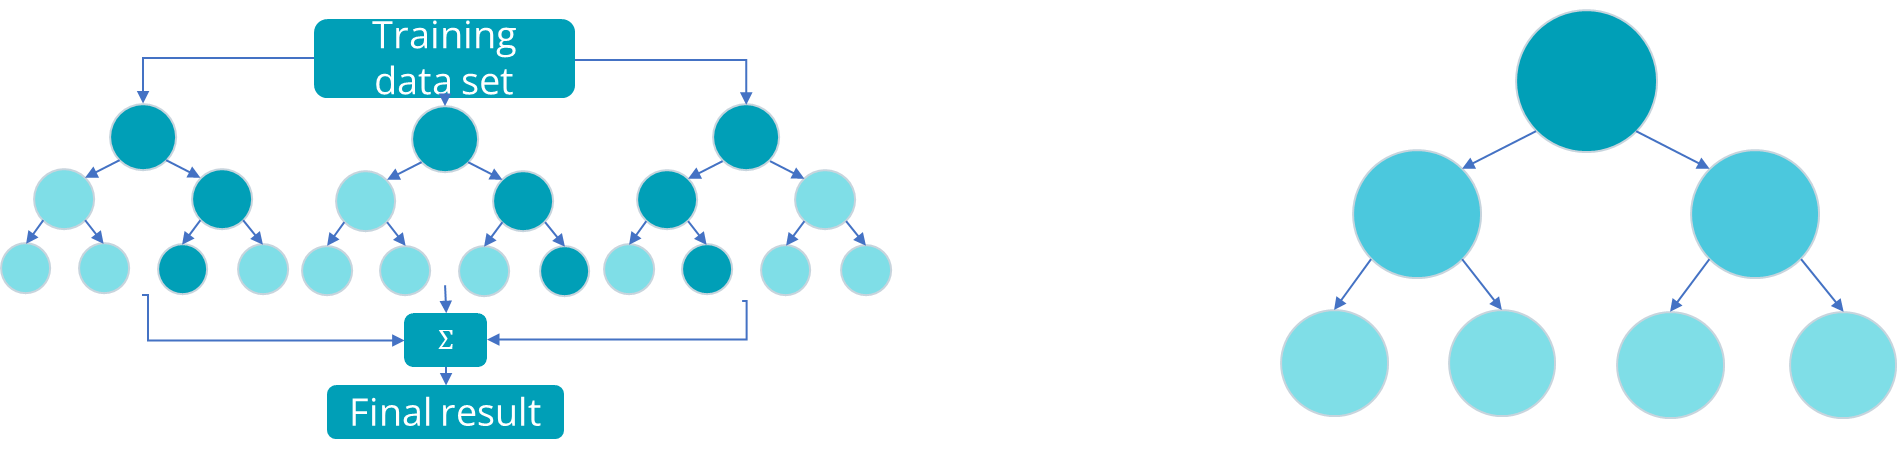

- Random forests choose a subset of features.
- Decision trees evaluate all possible feature splits.



###__3.1 Advantages of Random Forest__###

- Reduced risk of overfitting: While decision trees fix data in nodes and leaves, making predictions straightforward, random forests lower the risk of overfitting.

- Provides flexibility: It can handle the data set for classification as well as regression.
- Easy to determine: It makes it easy to determine which variable or feature is more important and has the highest contribution towards the model.


###__3.2 Disadvantages of Random Forest__###

- Time-consuming: While effective with large datasets, the algorithm slows down processing.
- Requires more resources: It doesn’t work with a small data set.
- More complex: Interpreting the prediction of a forest can be complex.



Now let us build a Random Forest model.


- Import pandas for data handling and NumPy for numerical operations.
- Load the dataset using pandas __.read_csv()__ and inspect the first few rows with __.head()__ to understand the data structure.
- Use __.info()__ to check for data types and missing values.


In [ ]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('petrol_consumption.csv')
print(dataset.head())
print(dataset.info())

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-n

- Select all columns except the target as features __(X)__.
- This is done by excluding the last column of the dataset.
- Convert the target variable, __Petrol_Consumption__, into a binary categorical variable __(y)__.
- This involves categorizing the consumption into two groups (above or below the median) to frame it as a classification problem.


In [ ]:
X = dataset.iloc[:, :-1].values

# For demonstration, let's assume 'Petrol_Consumption' has been converted to a categorical target variable
y = np.where(dataset['Petrol_Consumption'] > dataset['Petrol_Consumption'].median(), 1, 0)


- Divide the dataset into training and testing sets to train the model and evaluate its performance on unseen data.
- Use __train_test_split from sklearn.model_selection__ to split the features and target variable into training __(X_train, y_train)__ and testing sets __(X_test, y_test)__.
- Specify the __test_size__ (example: 0.2 for 20% of the data as the test set) and a __random_state__ for reproducibility.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


- Import __RandomForestClassifier__ from sklearn.ensemble.
- Initialize the classifier with a specified number of trees (example: n_estimators=100) and a random_state for reproducibility.
- Fit the model to the training data __(X_train, y_train)__.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

- Use the trained classifier to make predictions on the test set __(X_test)__.
- Calculate and print evaluation metrics such as accuracy, precision, and recall to understand the model's performance.
- Import the necessary functions from __sklearn.metrics__.

In [ ]:
from sklearn import metrics

y_pred = classifier.predict(X_test)
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Test Precision:', metrics.precision_score(y_test, y_pred))
print('Test Recall:', metrics.recall_score(y_test, y_pred))

Test Accuracy: 0.7
Test Precision: 0.8
Test Recall: 0.6666666666666666


### __Conclusion__

- These steps outline a complete workflow for a machine learning classification task, from data preparation to model evaluation.
- This process involves critical stages such as understanding the dataset, preparing the data for modeling, choosing an appropriate model, training the model, and evaluating its performance to ensure it can make accurate predictions on new, unseen data.

##__4. Support Vector Machine (SVM)__##


It is a supervised machine-learning algorithm used for both classification and regression challenges. It is mainly utilized for classification-related problems.



Let’s plot the data points in n-dimensional space, where n is the number of features in the data.


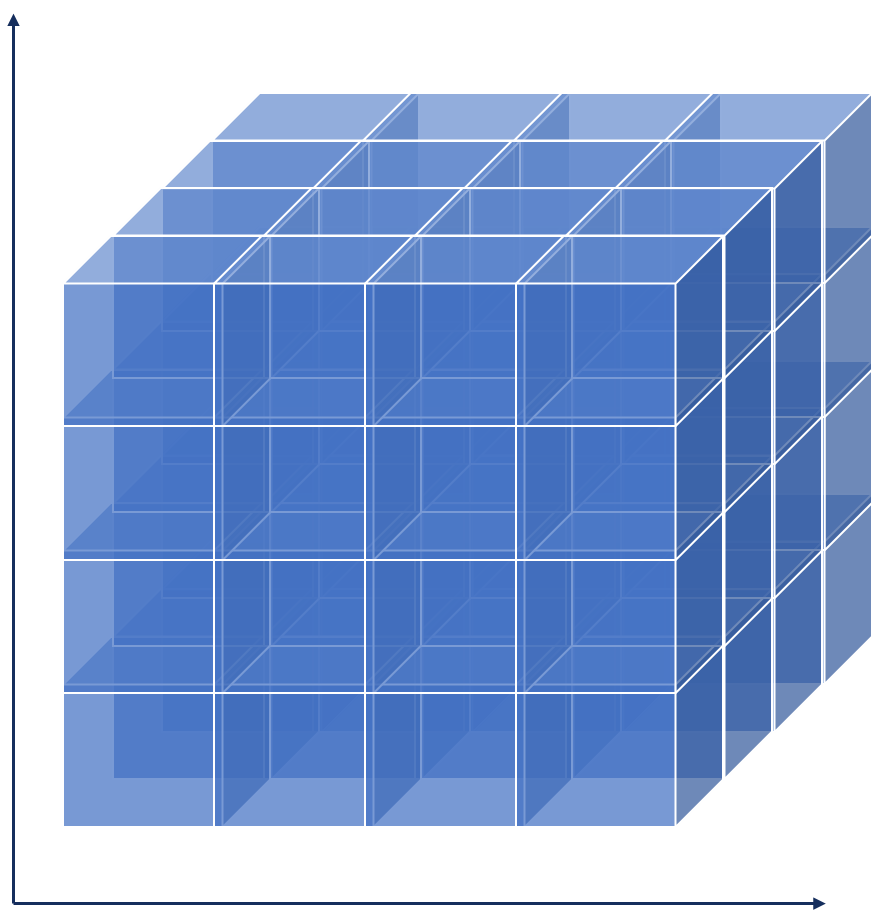

- Perform classification using hyperplane.
- Hyperplane helps differentiate the classes.


Following is a support vector algorithm:


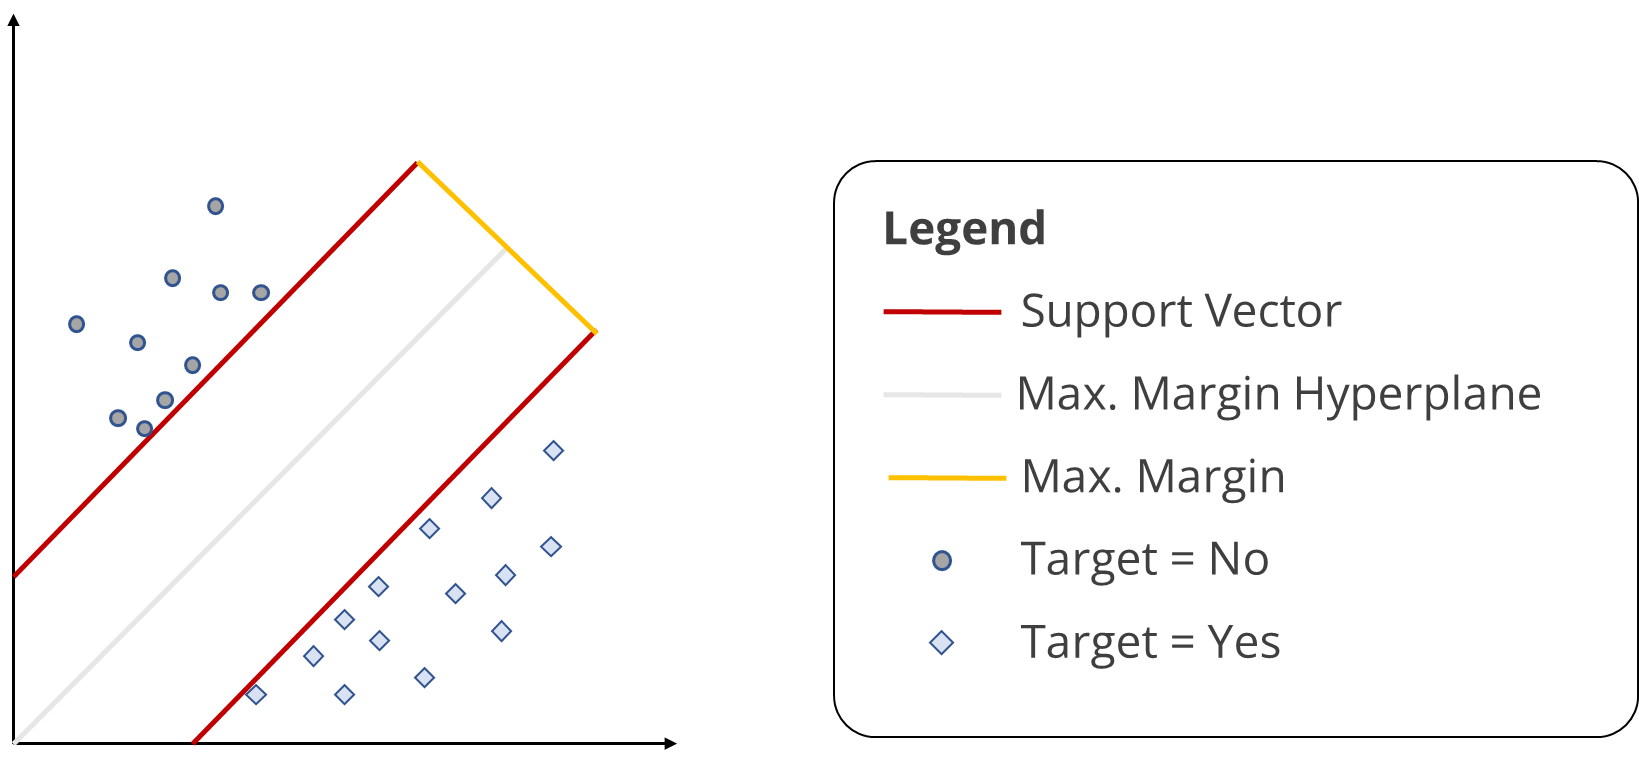

It provides analysis of data for classification and regression.

In this, plotting is done in the nth dimension.


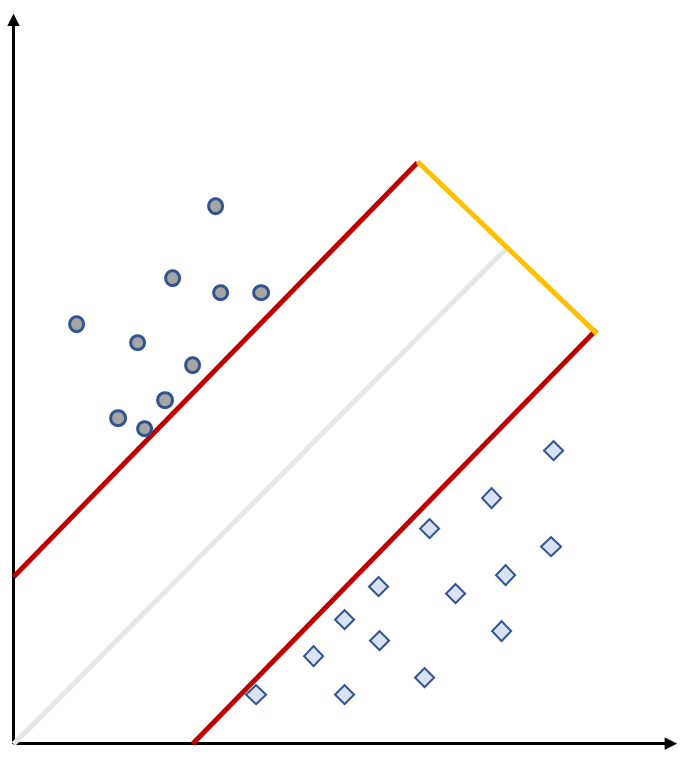

- The value of the data point and the value of the coordinate in the dimension are the same.

- The hyperplane helps classify the two classes of data.

- In KNN, a kernel function maps lower-dimensional data to higher-dimensional data.


There are two types of support vector machines:

Linear SVM separates the data in a linear format.
If the data set is separated into two using a straight line, the data is linearly separable.


Nonlinear SVM is used when data is nonlinearly separated.

If the data set cannot be separated into two using a straight line, the data is nonlinear.


Now let us implement SVM.

- Install and import the required libraries: NumPy, pandas, Seaborn, matplotlib, and scikit-learn.
- Load the heart.csv dataset.


In [ ]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("heart.csv")

- Display dataset information and summary statistics.
- Create a scatter plot of age and cholesterol.
- Check for missing values.
- Describe and see the basic statistics of the given features.


In [ ]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


__Observation__
- Here, you can see a few rows of the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


__Observations__
- As shown here, there are 303 observations and 14 features.
- All the features have a numeric data type except for ChestPain and Thal,
and there are no missing values.

Let’s describe and see the basic statistics of these features.

In [ ]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.683168
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.944808
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


__Observations__
- The average age is 54, and the standard deviation is 9.
- The average cholesterol is 246.

- Let’s plot age and cholesterol.
- Let's see if there is any relationship between age and cholesterol.

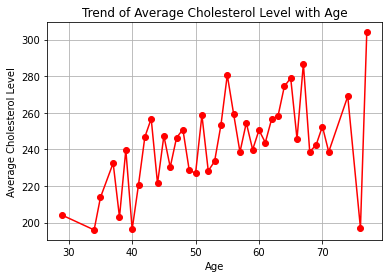

In [ ]:
# Group data by age and calculate mean cholesterol level for each age group
age_chol_mean = df.groupby('Age')['Chol'].mean()

# Plot a line plot with markers to show the trend in cholesterol levels with age
plt.plot(age_chol_mean.index, age_chol_mean.values, marker='o', color='red')

# Enhance labeling
plt.xlabel('Age')
plt.ylabel('Average Cholesterol Level')
plt.title('Trend of Average Cholesterol Level with Age')

# Show grid for better visualization
plt.grid(True)

# Show plot
plt.show()


__Observations__
- You can see that as age increases, cholesterol also increases.

In [ ]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

- Create dummy variables for categorical features.
- Separate the feature and target matrices.
- Split the dataset into training and testing sets.


In [ ]:
df_new = pd.get_dummies(df, columns= ['ChestPain', 'Thal'],drop_first= True)

Let's create x and y.

In [ ]:
x = df_new.drop('AHD',axis = 1)
y = df_new.AHD

Let's divide the data into training and testing sets.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100)

- Let’s import the GridSearchCV from the model selection.
- Create an SVM classifier.
- Define the parameter grid for tuning.
- Use GridSearchCV for hyperparameter tuning.
- The values inserted into param_grid are SVM model hyperparameter values, such as C, Gamma, and kernel.
- Fit the model to the training data.


In [ ]:
from sklearn.model_selection import GridSearchCV

ml = svm.SVC()

param_grid = {'C': [ 1, 10, 100, 1000,10000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1, cv=5, n_jobs=-1)

grid_search=grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [ ]:
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


__Observation__
- Based on the grid search, the best parameters are C at 10, gamma at 0.001, and kernel at rbf.

- Calculate the accuracy of the training data.
- Predict the target variable for the test data.
- Calculate the accuracy of the test data.
- Display the confusion matrix and classification report.

In [ ]:
accuracy = grid_search.best_score_

In [ ]:
accuracy

0.7561224489795918

__Observation__
- The accuracy is 75%.

In [ ]:
y_test_hat = grid.predict(x_test)

Let's examine the confusion matrix for the test data.


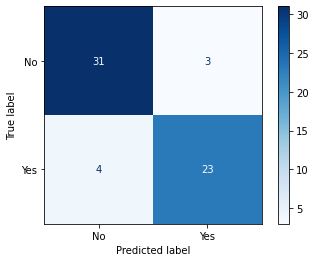

In [ ]:
confusion_mat = confusion_matrix(y_test, y_test_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=grid.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

__Observations__
- The model misclassified 31 cases as **No** instead of **Yes**.
- It predicted 23 cases as **Yes** instead of **No**.

Let's check the classification report.

In [ ]:
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

          No       0.89      0.91      0.90        34
         Yes       0.88      0.85      0.87        27

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



__Observation__
- The results show an accuracy of 0.89, with precision and recall at 0.88 and 0.85, respectively.


##__Conclusion__##

This lesson offers a thorough understanding of a fundamental task in supervised learning.
 In this lesson, you explored classification's definition, types, techniques, and evaluation metrics. You examined classification models such as decision trees, random forests, and support vector machines.
 Overall, this lesson has provided you with a solid foundation in machine learning classification, enabling you to apply these techniques to a wide array of real-world problems.
